# 🧮 Fractional Calculus in Julia 🔴🟢🟣
### by **Pedro M. Xavier** [](https://github.com/pedromxavier)


<style type='text/css'>
.CodeMirror{
font-family: "Inconsolata"
</style>

$$\newcommand{\dd}[3][]{\frac{{d^{#1}}#2}{{d}#3^{#1}}}\newcommand{\Sin}[1]{\sin\left(#1\right)}\newcommand{\Cos}[1]{\cos\left(#1\right)}$$

## Introduction
In a few words, Fractional Calculus is the branch of Calculus that studies the behavior of derivatives and integrals when their order is not an integer. Sometimes, it's not even a number!
For some intuition, let's take the basic trigonometric functions as our kindergarten. We know from fundamental Calculus that

$$
\dd{\Sin{t}}{t} = \Cos{t}
$$

In other hand, another basic property, this time from school trigonometry, tells us that

$$
\Cos{t} = \Sin{t + \frac{\pi}{2}}
$$

From the combination of the two, an interesting property appears:

$$
\begin{align}
    \dd{\Sin{t}}{t} &= \Sin{t + \frac{\pi}{2}} \\
    \implies \dd[2]{\Sin{t}}{t} &= \Sin{t + \pi}\\
    &~\,\vdots\\
    \implies \dd[k]{\Sin{t}}{t} &= \Sin{t + k\,\frac{\pi}{2}}\\
\end{align}
$$

Nothing beyond what would be requested to be proven on a first year exam. Now suppose $k$ belongs to the positive reals $[0, \infty)$, instead of the good ol' $\mathbb{N}$. Indeed, as you might expect, the same happens with the cosine.
Actually, there is another example that is, in my opinion, even easier to grasp: the exponential function. Sine's more general cousin has the funniest derivative around, since

$$
    \dd{e^{a t}}{t} = a e^{a t}
$$

then, immediately, we know that 

$$
    \dd[k]{e^{a t}}{t} = a^{k} e^{a t}
$$

whatever $k$ means.

Last but not least, polynomials. These get a little bit trickier, since we introduce factorials in it's $k$-th derivative expression. Take a monomial $x^m$. It's derivative is given by

$$
    \dd{x^m}{x} = m x^{m - 1}
$$

The second derivativa comes as

$$
    \dd[2]{x^m}{x} = m (m - 1) x^{m - 2}
$$

It's not hard to wonder if the $k$-th one is written as follows:

$$
    \dd[k]{x^m}{x} = m\, (m - 1) \cdots (m - k + 1)\, x^{m - k} = \frac{m!}{(m - k)!} x^{m - k}
$$

For $k$ to lie in $\mathbb{R}$, we may say that $\Gamma\left( x + 1 \right) = x!$, yielding

$$
    \dd[k]{x^m}{x} = \frac{\Gamma \left[m + 1\right]}{\Gamma \left[m - k + 1\right]} x^{m - k} \tag{1}\label{eq:fd:poly}
$$

There is even a special case for polynomials: a constant term!

&#8212; But derivatives of a constant are always zero, right?! 🤔

Nope, there's a lot hidden between derivatives of integer order. To actually see what happens, we could say that for some $c \in \mathbb{R}$, $c = x^{0}$ thus plugging $m = 0$ in equation $[\ref{eq:fd:poly}]$ yields

$$
    \dd[k]{c}{x} = \dd[k]{x^0}{x} = \frac{\Gamma \left[1\right]}{\Gamma \left[1 - k\right]} x^{-k} = \frac{x^{-k}}{\Gamma \left[1 - k\right]}
$$

In fact, when $k$ is a positive integer, the Gamma function argument $1 - k$ will be a negative one, and that is exactly when $\Gamma\left[1 - k\right] \to \pm \infty$. This explains why $D^{k} c = 0$ for $k \in \mathbb{N}$. Between every pair of neighbour positive integers, the function's values are mainly driven by the $x^{-k}$ factor.

## &#8212; I want to see it! 👁️👁️
Of course you do! We might begin with the graph of the constant's derivative before diving in those views from the main functions discussed above.

In [1]:
# Load Plot Library and the GR backend.
using Plots; gr();

# Load also our pretty Gamma function.
using SpecialFunctions;

## 👁️ _Constants_  👁️

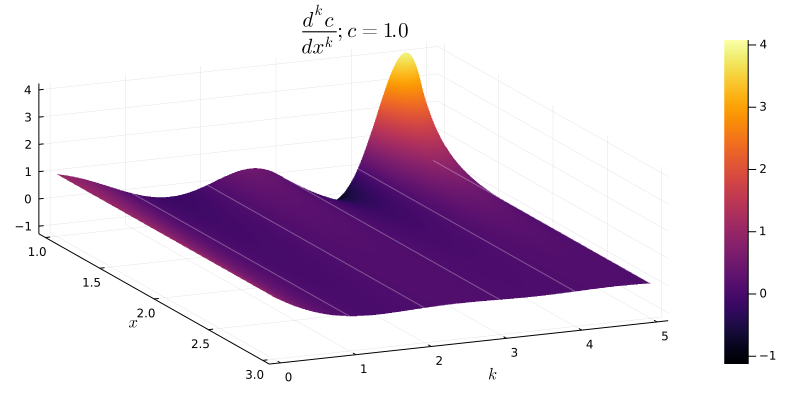

In [2]:
function dconst(x, c, k)
    # k-th constant derivative
    z = 1 - k
    
    # Checks if z is a negative integer
    if (z < 0.0) && ((z % 1.0) ≈ 0.0)
        return 0.0
    else
        return x^(-k) / gamma(z)
    end
end;

# Parameters
a = 0
b = 5

c = 1.0

# Plot Domain
x = 1.0:1e-2:3.00;
k = a:1e-2:b;

## Set Plot Options
default(size=(800,400), fc=:inferno, camera=(60, 60))

## Surface
z = Surface((x, y) -> dconst(x, c, y), x, k)

## Plot Surface
surface(x, k, z, linealpha = 0.3)

## Plot Contour for fixed k
u = copy(x)
v = ones(size(x, 1))
for i in 1:b
    α = (b - a) * i / b
    w = [dconst(j, c, α) for j in u]
    plot!(u, v * α, w, color="white", linealpha=0.3, label=false) 
end

##  Set Plot text
title!(raw"$\frac{d^{k} c}{d x^k}; c = "*"$c"*raw"$")
xlabel!(raw"$x$")
ylabel!(raw"$k$")

## 👁️ _Sine_  👁️

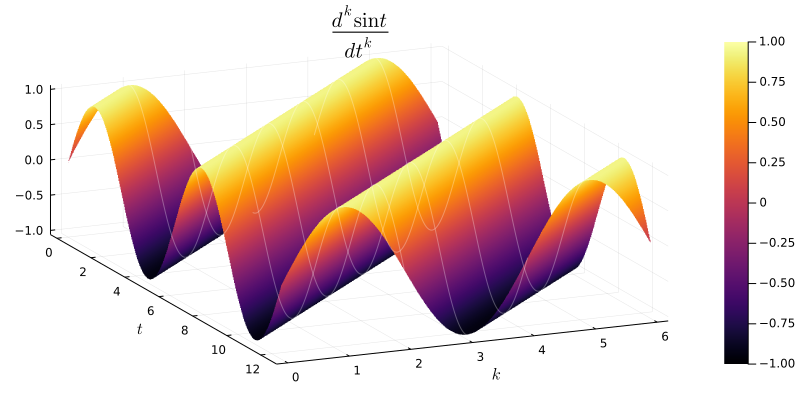

In [3]:
## Function Definition
function dsin(t, k)
    # k-th sine derivative
    return sin(t + k * (π / 2.0))
end;


# Domainand image [0, π] -> [-1, 1]
t = 0.0:1e-2:4*π;
k = 0.0:1e-2:6.0;

## Set Plot Options
default(size=(800,400), fc=:inferno)

## Surface
z = Surface(dsin, t, k)

## Plot Surface
surface(t, k, z, linealpha = 0.3)

## Plot Contour for fixed k
u = copy(t)
v = ones(size(t, 1))
for i in 1:5
    α = i
    w = [dsin(j, α) for j in u]
    plot!(u, v * α, w, color="white", linealpha=0.3, label=false) 
end

##  Set Plot text
title!(raw"$\frac{d^{k} \sin t}{d t^k}$")
xlabel!(raw"$t$")
ylabel!(raw"$k$")

## 👁️ _Exponential_  👁️

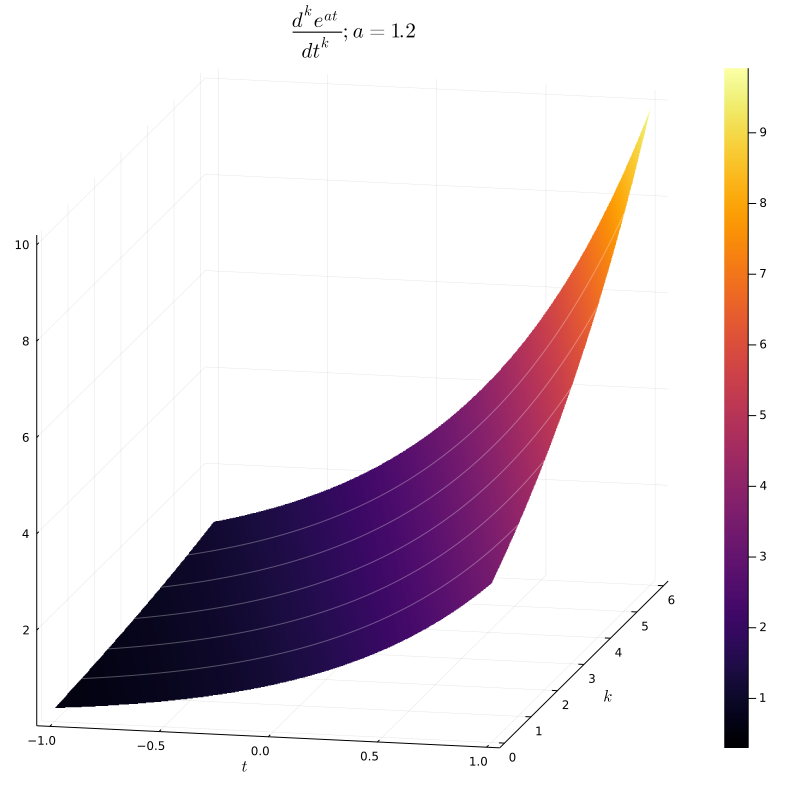

In [4]:
## Function Definition
function dexp(a, t, k)
    # k-th exponential derivative
    (a ^ k) * exp(a * t)
end

# Domain and image [-1, 1] -> [-1, 1]
t =-1.0:1e-2:1.0;
k = 0.0:1e-2:6.0;

## Parameter definition
a = 1.2

## Set Plot Options
default(size=(800,800), fc=:inferno, camera=(20, 35))

## Surface
z = Surface((x, y) -> dexp(a, x, y), t, k)

## Plot Surface
surface(t, k, z, linealpha = 0.3)

## Plot Contour for fixed k
u = copy(t)
v = ones(size(t, 1))
for i in 1:5
    α = i
    w = [dexp(a, j, α) for j in u]
    plot!(u, v * α, w, color="white", linealpha=0.3, label=false) 
end

##  Set Plot text
title!(raw"$\frac{d^{k} e^{a t}}{d t^k}"*"; a = $a"*raw"$")
xlabel!(raw"$t$")
ylabel!(raw"$k$")

## 👁️ _Polynomial_  👁️

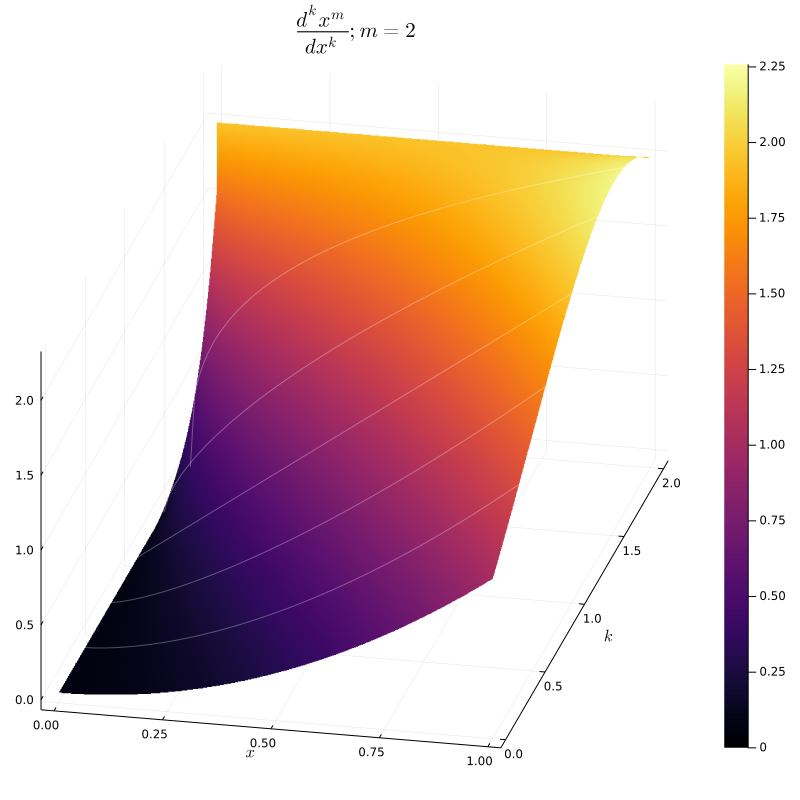

In [5]:
function nint(x)
    if x < 0.0 && ((x % 1.0) ≈ 0.0)
        return true
    else
        return false
    end
end

## Function Definition
function dpoly(m, x, k)
    # k-th exponential derivative
    a = m + 1
    b = m - k + 1
    if !(nint(a) || nint(b))
        return (x ^ (m - k)) * (gamma(a) / gamma(b))
    else
        return 0.0
    end
end

# Domain and image [-1, 1] -> [-1, 1]
x = 0.0:1e-2:1.0;
k = 0.0:1e-2:2.0;

## Parameter definition
m = 2

## Set Plot Options
default(size=(800,800), fc=:inferno, camera=(20, 55))

## Surface
z = Surface((x, y) -> dpoly(m, x, y), x, k)

## Plot Surface
surface(x, k, z, linealpha = 0.3)

## Plot Contour for fixed k
u = copy(x)
v = ones(size(x, 1))
for i in 1:5
    α = i / 3.0
    w = [dpoly(m, j, α) for j in u]
    plot!(u, v * α, w, color="white", linealpha=0.3, label=false) 
end

##  Set Plot text
title!(raw"$\frac{d^{k} x^{m}}{d x^k}"*"; m = $m"*raw"$")
xlabel!(raw"$x$")
ylabel!(raw"$k$")

## Fourier Intensifies
$$
\partial^{\alpha} f(t) = \mathcal{F}^{-1}\left\{ (i \omega)^{\alpha} \mathcal{F} \left\{ f \right\} (\omega) \right\}
$$